In [53]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [54]:
path = "index.csv"
df = pd.read_csv(path)

df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [61]:
# columnas 

print( df["cash_type"].unique() )
df["efectivo"] = df["cash_type"].apply(lambda x: 1 if x == "cash" else 0)
df["tarjeta"] = df["cash_type"].apply(lambda x: 1 if x == "card" else 0)
#df = df.drop(columns="cash_type")

df["datetime"] = pd.to_datetime(df["datetime"])
df["hora"] = df["datetime"].dt.time
df["date"] = pd.to_datetime(df["date"])
df["mes"] = df["datetime"].dt.to_period("M")
df["semana"] = df["datetime"].dt.to_period("W")

df.head()

['card' 'cash']


,date,datetime,cash_type,card,money,coffee_name,efectivo,tarjeta,hora,mes,semana
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,0,1,10:15:50.520000,2024-03,2024-02-26/2024-03-03
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,0,1,12:19:22.539000,2024-03,2024-02-26/2024-03-03
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,0,1,12:20:18.089000,2024-03,2024-02-26/2024-03-03
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,0,1,13:46:33.006000,2024-03,2024-02-26/2024-03-03
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,0,1,13:48:14.626000,2024-03,2024-02-26/2024-03-03


In [56]:
for i in df["coffee_name"].unique():
    print(i)

print("\n")

for i in df["money"].unique():
    print(i)

df.shape

Latte
Hot Chocolate
Americano
Americano with Milk
Cocoa
Cortado
Espresso
Cappuccino


38.7
28.9
33.8
40.0
24.0
35.0
30.0
25.0
32.82
39.0
37.72
27.92
29.0
34.0
23.02


(896, 8)

In [64]:
# Total money

round(df["money"].sum(), 2)

30592.94

In [72]:
# Card Money and Cash Money

{
    "Card": df[ df["cash_type"] == "card" ]["money"].sum(),
    "Cash": df[ df["cash_type"] == "cash" ]["money"].sum()
}

{'Card': 27406.94, 'Cash': 3186.0}

Visualizaciones

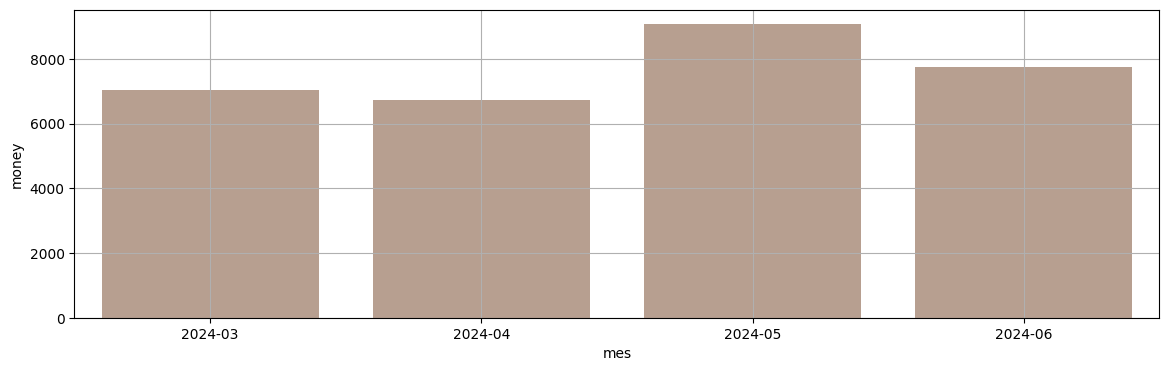

In [90]:

df_por_mes = df.groupby("mes").agg({ "money": ["sum", "count"]}).reset_index()

df_por_mes.columns = ["mes", "money", "cups"]

df_por_mes

plt.figure(figsize=(14, 4))
sns.barplot( df_por_mes, y="money", x="mes", color="#bd9e8a" )
plt.grid()

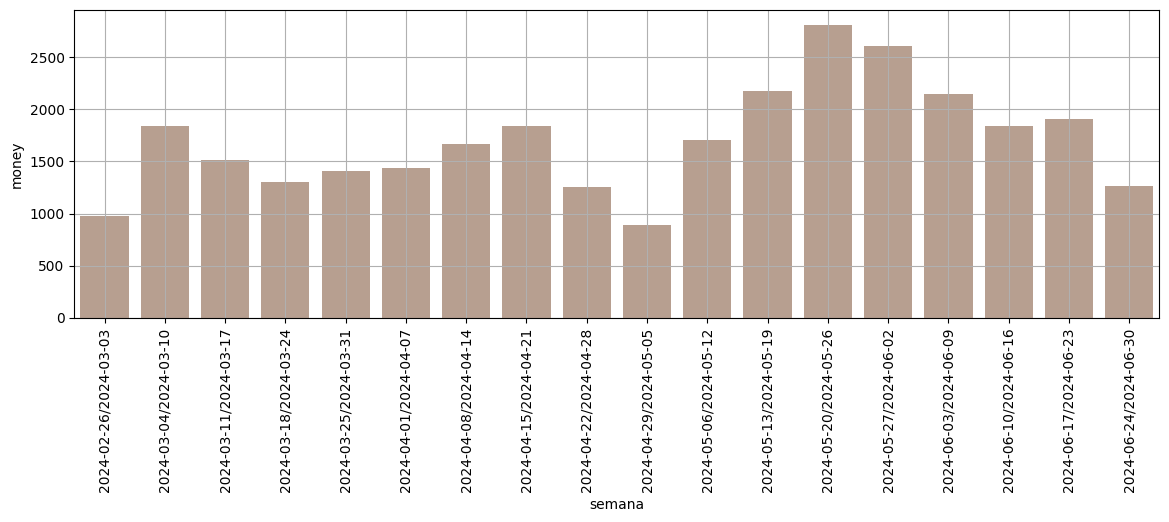

In [107]:
# Money for each week

df_por_semana = df.groupby("semana").agg( {"money": ["sum", "count"]}).reset_index()
df_por_semana.columns = ["semana", "money", "cups"]

df_por_semana.head()

plt.figure(figsize=(14, 4))
sns.barplot(df_por_semana,  x="semana", y="money", color="#bd9e8a" )
plt.xticks(rotation=90)
plt.grid()

        date
0 2024-03-01
1 2024-03-02
2 2024-03-03
3 2024-03-04
4 2024-03-05
        date  money  cups
0 2024-03-01  396.3    11
1 2024-03-02  228.1     7
2 2024-03-03  349.1    10
3 2024-03-04  135.2     4
4 2024-03-05  338.5     9


(0.0, 604.17)

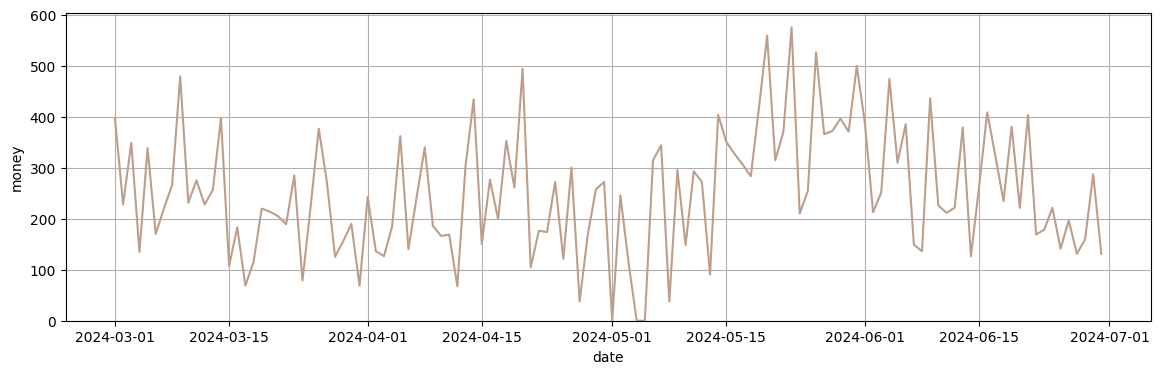

In [130]:
# Money for each day

date_range = pd.date_range(start=df["date"].min(), end=df["date"].max()  )
complete_dates = pd.DataFrame(date_range, columns=["date"])
df_por_date = df.groupby("date").agg({"money": ["sum", "count"]}).reset_index()
df_por_date.columns = ["date", "money", "cups"]

df_completo = pd.merge(
    complete_dates, df_por_date,
    on="date", how="left"
)

df_completo.fillna(0, inplace=True)

print(complete_dates.head())
print(df_por_date.head())


df_completo.head()


# plotting

plt.figure(figsize=(14, 4))
sns.lineplot(df_completo, x="date", y="money", color="#bd9e8a")
plt.grid()
plt.ylim(0)    